# Data Augmentation and CNN Model Training on ASL Alphabet Data for Gestures Classification
## Importing Dependencies

In [9]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))  # Add src/ to sys.path to import modules (e.g. utils)

import string

import torch
from torch.utils.data import DataLoader

from src.utils.visualization import plot_confusion_matrix, save_figure
from src.utils.model_testing_utils import get_predictions, evaluate_model
from src.transforms.transforms import get_test_transforms
from src.models.alphabet_gesture_classification_model import ASLAlphabetClassificationModel
from src.datasets.asl_alphabet_dataset import ASLAlphabetDataset

In [2]:
# List of all the letters in the ASL alphabet and other gestures
signs = list(string.ascii_uppercase)
signs.remove("Z") 
signs.append("nothing") 

# Number of signs
num_signs = len(signs)

class_to_idx = {signs[i]: i for i in range(num_signs)}
print(class_to_idx)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'nothing': 25}


In [3]:
data_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "data"))
model_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "src", "models", "checkpoints"))

In [4]:
model = ASLAlphabetClassificationModel(num_classes=num_signs)
model.load_state_dict(torch.load(os.path.join(model_dir, "model_state_dict.pth"), map_location=torch.device("cpu")))
model.eval()

ASLAlphabetClassificationModel(
  (landmarks_branch): LandmarksBranch(
    (block1): Sequential(
      (0): Flatten(start_dim=1, end_dim=-1)
      (1): Linear(in_features=63, out_features=128, bias=True)
      (2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (3): LeakyReLU(negative_slope=0.01)
    )
    (dropout1): Dropout(p=0.25, inplace=False)
    (block2): Sequential(
      (0): Linear(in_features=128, out_features=256, bias=True)
      (1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (dropout2): Dropout(p=0.5, inplace=False)
    (block3): Sequential(
      (0): Linear(in_features=256, out_features=64, bias=True)
      (1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
  )
  (sign_image_branch): SignNetV1Branch(
    (conv_block1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): BatchNorm2d(64, eps=1e-05,

In [5]:
test_transforms = get_test_transforms()

test_dataset = ASLAlphabetDataset(
    data_dir=os.path.join(data_dir, "asl-alphabet-test"),
    landmarks_dir=os.path.join(data_dir, "asl-alphabet-test-landmarks"),
    transforms=test_transforms,
    class_to_idx=class_to_idx,
    rotate_flip=False
)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)

# Confusion Matrix

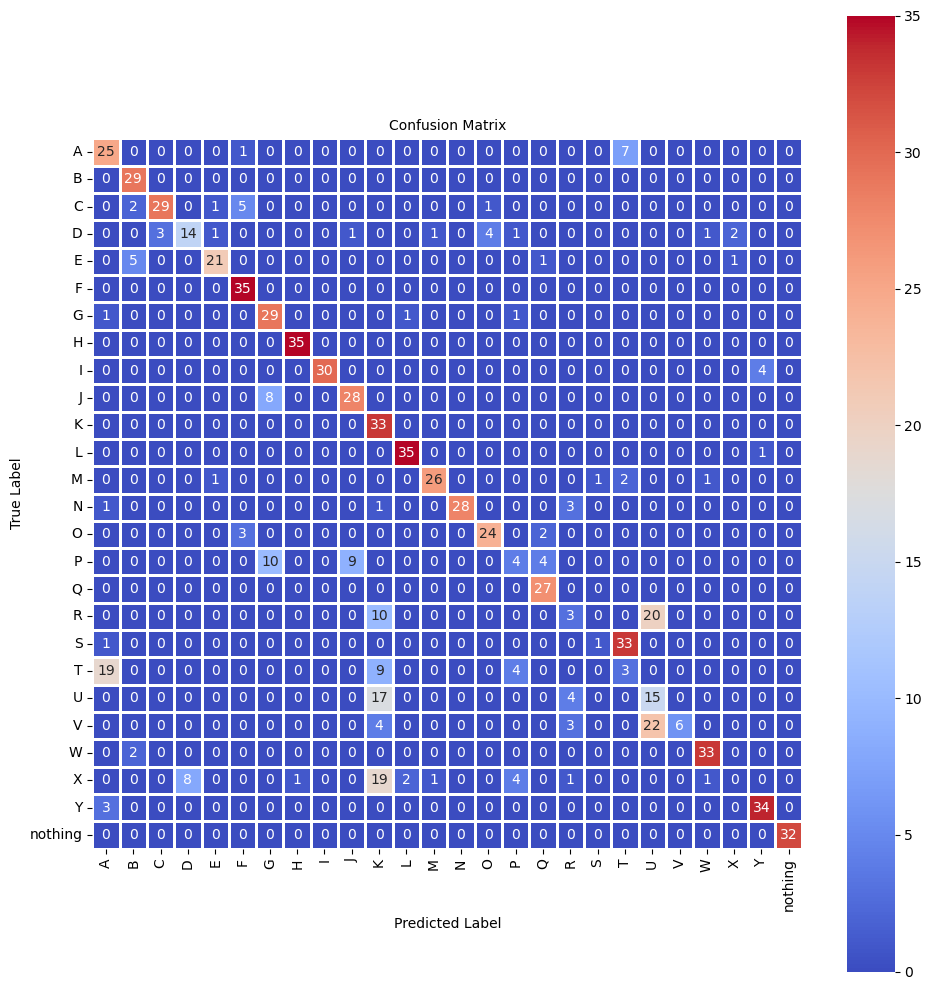

Figure saved ✅


In [10]:
reports_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "reports", "evaluation"))

y_true, y_pred = get_predictions(model, dataloader=test_dataloader)
fig = plot_confusion_matrix(y_true, y_pred, signs)

save_figure(fig, os.path.join(reports_dir, "confusion_matrix.png"))

In [8]:
_ = evaluate_model(model, test_dataloader, signs)


🔍 Evaluation Metrics:
Accuracy: 0.6740395809080326
F1 Score (macro): 0.6476215456494874
Precision (macro): 0.6779742915193876
Recall (macro): 0.6825678617032449

Classification Report:
              precision    recall  f1-score   support

           A       0.76      0.50      0.60        50
           B       1.00      0.76      0.87        38
           C       0.76      0.91      0.83        32
           D       0.50      0.64      0.56        22
           E       0.75      0.88      0.81        24
           F       1.00      0.80      0.89        44
           G       0.91      0.62      0.73        47
           H       1.00      0.97      0.99        36
           I       0.88      1.00      0.94        30
           J       0.78      0.74      0.76        38
           K       1.00      0.35      0.52        93
           L       0.97      0.92      0.95        38
           M       0.84      0.93      0.88        28
           N       0.85      1.00      0.92        28
   